# 신경망의 구조

- 네트워크를 구성하는 층
- 입력 데이터와 그에 상응하는 타깃
- 학습에 사용할 피드백 신호를 정의하는 손실 함수
- 학습 진행 방식을 결정하는 옵티마이저

## layer 층 : 딥러닝의 구성 단위
- 층이란 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈이다.
- 대부분의 층은 가중치라는 층의 상태를 가지게 된다. 
- 여기서 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서이며 여기에 네트워크가 학습한 지식이 포함되어 있다.<br><br>

층마다 적절한 텐서 포멧과 데이터 처리 방식이 다르다.
- 2D : 완전 연결 층이나 밀집 층이라 불리는 밀집 연결 층
- 3D : 순환 층
- 4D : 2D 합성곱 층 <br><br>

이런 다양한 층을 구성하여 네트워크를 만드는데, keras에서는 이를 레고 블럭과 같이 생각할 수 있다. 그 이유는 층 호환성(layer compatibility)에 따라서 호환 가능한 층 등을 엮어 데이터 변환 파이프라인(pipeline)을 구성하여 모델을 만들기 때문이다. 특정 크기의 입력을 받고, 특정 크기의 출력 텐서를 반환하는 것이다. 


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10))

- 위에서 모델(네트워크)에 2 종류의 층을 만든다.
- 처음에는 784차원인 2D 텐서를 입력으로 받는다.
- 그 후에는 input에 대한 제한 없이 층을 만든다.
- keras에서는 모델에 추가된 층을 자동으로 상위 층의 크기에 맞추어주기 때문에 두 번째 층은 첫 번째 층의 출력 크기를 입력 크기로 자동 채택한다.

## 모델 : 층의 네트워크

딥러닝 모델은 층으로 만든 비순환 유향 그래프(DAG)이다. 가장 일반적인 예시는 하나의 입력을 하나의 출력으로 매핑하는 층을 순서대로 쌓는 것이다. 하지만 네트워크는 다양한 구조를 지닌다.<br><br>
- 가지(branch)가 2개인 네트워크
- 출력이 여러 개인 네트워크
- 인셉션(inception) 블록<br><br>

네트워크는 가설 공간(hypothesis space) 을 정의한다. 네트워크 구조를 선택함으로싸 가설 공간을 입력 데이터에서 출력 데이터로 매칭하는 일련의 특정 텐서 연산으로 제한하게 된다. 딥러닝에서는 텐서 연산에 사용되는 가중치의 최적 값을 찾는 것을 목표로 한다.

## 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠

네트워크 구조를 정의하고 나면 두 가지를 더 선택한다.<br><br>

- 손실함수 또는 목적함수 : 훈련하는 동안 최소화될 값, 성공 지표
- 옵티마이저 : 손실 함수를 기반으로 네트워크 업데이트를 결정, 특정 종류의 SGD(확률적 경사 하강법)을 구현<br><br>

여러 개의 출력을 내는 신경망은 여러 개의 손실 함수를 가질 수 있다. (출력당 하나씩) 그러나 경사 하강법 과정은 하나의 손실 value를 필요로 하므로, 손실 함수가 여러개인 케이스는 스칼라의 합과 평균으로 계산한다.

딥러닝은 결과값의 최적화만을 목표로 하므로, 문제에 대한 설정, 제한을 정의하는 목적함수가 중요하다.

일반적인 문제에서는 다음과 같은 간단한 지침이 있다.

- 2개의 클래스 분류 문제 : binary_crossentropy
- 여러 클래스 분류 문제 : categorical Cross Entropy
- 회귀 문제 : 평균 제곱 오차(Mean squared error)
- 시퀀스 학습 문제 : Sequence-to-Sequence

# 영화 리뷰 분류: 이진 분류 예제

two-class classfication 또는 binary classfication은 가장 기본적인 머신 러닝 문제이다.  리뷰 텍스트를 기반으로 영화 리뷰를 positive와 negative로 분류하는 방법을 익힌다.

## IMDB 데이터셋 
- IMDB(Internet Movie Database)는 양극단의 5만 개의 리뷰로 이루어진 데이터이다. 25,000개의 훈련 데이터, 25,000개의 테스트 데이터로 이루어져 있다.

- 당연하지만 훈련 데이터와 테스트 데이터는 같이 사용하면 안된다. 훈련과 다른 데이터로 진행을 해야 분류가 확실하게 일어나고 있는 지를 판단할 수 있기 때문이다. 마치 답지보고 시험치면 안되는 것과 마찬가지이다.

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


- num_words = 10000 매개변수는 훈련데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미이다. 
- train_data와 test_data는 리뷰의 목록으로 위에서 구한 10000개의 데이터 리스트에서 인덱스를 가지고 있는 리스트이다.
- train_labels와 test_labels는 긍정은 1, 부정은 0으로 각 리뷰에 대한 긍정/부정에 대한 value를 담고 있다.

## 데이터 준비

신경망에 숫자 리스트를 직접적으로 넣을 수는 없기에 텐서로 변경하는 작업이 필요하다.

- 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환한다. 그 다음 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용한다. (Embedding 층)
- 리스트를 one-hot encoding하여 0과 1 벡터로 변환한다. 이는 마치 radix sort와 비슷하게 단어의 개수 10000개와 같은 크기의 벡터를 0으로 채우고, 있는 단어 인덱스에만 1을 넣는 방식이다. 리뷰가 10000 단어 이하라면 2번의 경우가 더 메모리를 많이 사용하는 것이다.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블 벡터 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 신경망 모델 만들기

입력 데이터가 벡터고, 레이블은 스칼라이다. 이런 문제에서는 relu 활성화 함수를 사용한 완전 연결 층을 이용하면 된다.

코드에서는 **Dense(16, activation='relu')** 와 같이 쓸 수 있다. 매개변수 16은 은닉 유닛(hidden_unit) 의 개수이다. 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 된다.

이 예제에서는 relu 활성화 함수를 사용한 Dense 층을 다음 텐서 연산을 연결하여 구현했다.

In [ ]:
output = relu(dot(W, input)+b)

16개의 은닉 유닛이 있다는 것은 가중치 행렬 W 크기가 (input_dimension, 16)이라는 뜻이다.

그렇다면 위 연산의 결과는 입력을 16차원으로 출력을 하고, 편향 벡터 b를 더 한후 relu 연산을 적용하는 것이다. 

즉, 은닉 유닛은 신경망의 데이터를 얼마나 복잡하게 표현할 것인가를 결정할 수 있다고 생각하면 된다.<br><br>

Dense 층을 쌓을 때 두 가지 중요한 구조상의 결정이 필요하다.

- 얼마나 많은 층을 사용할 것인가?
- 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?


이 예제에서는 다음과 같은 구조를 사용한다.

- 16개의 은닉 유닛을 가진 2개의 층
- 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층


즉 앞의 층은 relu를 이용하고, 마지막 층은 확률 표현을 위해 sigmoid 함수를 사용한다.

In [ ]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

모델을 정의했으면 손실 함수와 옵티마이저를 선택해야 한다.
- 이진 분류 문제 + 확률 출력 : binary_crossentropy 손실이 적합
- RMSprop 옵티마이저 사용
- 측정지표 : accuracy

RMSprop는 기존 경사 하강법보다 빠르다는 특징이 있다.

모델을 정의하고 손실 함수와 옵티마이저를 선택했으면 complie함수를 통해 학습 과정을 설정한다.

In [ ]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

compile 함수에서 사용자의 목적에 따라 custom이 가능하다

In [ ]:
# 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 훈련 검증

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000의 샘플을 떼어 검증 세트를 만들어야 한다.

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킨다.

또한 동시에 따로 떼어 놓은 10,000개의 샘플에서 손실과 정확도를 측정한다. 

keras에서는 validation_data 매개변수에 검증 데이터를 전달한다.

In [ ]:
# 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 70ms/step - loss: 0.5415 - accuracy: 0.7711 - val_loss: 0.4117 - val_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3256 - accuracy: 0.9012 - val_loss: 0.3459 - val_accuracy: 0.8614
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2354 - accuracy: 0.9241 - val_loss: 0.2780 - val_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1851 - accuracy: 0.9396 - val_loss: 0.2759 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1512 - accuracy: 0.9511 - val_loss: 0.2752 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1226 - accuracy: 0.9617 - val_loss: 0.2880 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1015 - accuracy: 0.9691 - val_loss: 0.3093 - val_accuracy: 0.8849
Epoch 8/20
30

history에는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있다.

속성에는 4가지가 포함되어 있다.

- acc : 훈련 정확도
- loss : 훈련 손실값
- val_acc : 검증 손실값
- val_loss : 검증 정확도

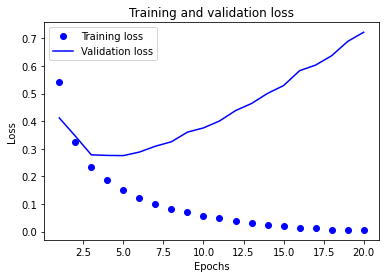

In [ ]:
# 훈련과 검증 손실 시각화
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

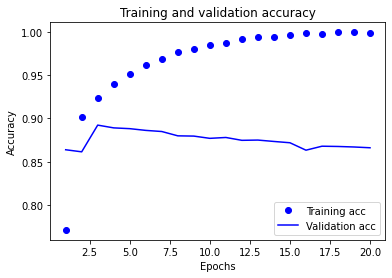

In [ ]:
# 훈련과 검증 정확도 시각화
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()
fig2.savefig('fig2.png', dpi=100)

훈련에 대한 결과의 경우 기대치만큼 나오는 것을 볼 수 있지만, 검증 손실과 정확도는 그렇지 않다.
<br><br>
그 이유는 overfitting이 일어나 훈련데이터에 대한 과도한 최적화로 일반 데이터에서(여기서는 validation 데이터)는 정확도가 떨어지기 때문이다.<br><br>

 3~4번째부터 경향성이 보이니 4번째 epoch동안만 훈련을 진행하여 결과를 확인한다..<br><br>

 fit()함수를 재호출하면 학습된 가중치에서 다시 시작하게 되므로, 처음부터 층을 쌓아야 한다.

In [ ]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4556 - accuracy: 0.8299
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2663 - accuracy: 0.9072
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2069 - accuracy: 0.9261
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2877 - accuracy: 0.8862
[0.2876732051372528, 0.8862400054931641]


대략 88%의 정확도를 달성하였다.

## 정리
- 원본 데이터를 신경망에 텐서로 주입하기 위해서는 많은 전처리가 필요하다.
- rmsprop는 문제와 상관없이 좋은 옵티마이저이다.
- 과대적합을 막기 위해 항상 훈련 데이터 이외의 데이터에서 성능 모니터링이 필요하다.

# 뉴스 기사 분류: 다중 분류 문제

이제는 2개 이상의 클래스를 분류하는 문제이다. 

이번 문제는 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망을 만드는 것이다.

1개의 뉴스는 1개의 토픽으로 매칭되므로 단일 레이블 다중 분류 문제라고 할 수 있다.

## 로이터 데이터셋
- 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋은 텍스트 분류를 위해 사용된다.
- 46개의 토픽을 가지고 있으며 토픽에 따라 샘플의 개수는 다르며, 각 토픽은 최소 10개의 샘플을 가지고 있다.

IMDB와 같이 가장 자주 등장하는 단어 10,000개로 제한하여 학습을 진행한다.

In [ ]:
# 로이터 데이터셋 로드하기
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

8,982개의 훈련 샘플과 2246개의 테스트 샘플이 있다.


## 데이터 준비
- IMDB와 같이 데이터를 벡터로 변환한다.
- 로이터 데이터의 레이블값도 원-핫 인코딩을 통해 데이터를 변환한다.

In [ ]:
import numpy as np

# 정수 리스트를 벡터화하는 사용자 함수
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

keras에서는 이를 위한 내장 함수가 있다.

In [ ]:
# keras 내장 함수
from keras.utils.np_utils  import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 모델 구성
imdb와 거의 같지만, 이번에는 출력결과가 2개로 나누어지는 것이 아닌 46개라는 차이점이 있다. 

16차원은 46개의 데이터를 구분하지 못할 수 있으니 이번에는 64개의 유닛을 이용한다.

In [ ]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

위의 이진 분류 예제와 차이점이 두 가지가 있다.
- 마지막 출력이 46이다. 각 입력 샘플에 대해 46차원 벡터를 출력한다는 뜻이다.

- softmax 활성화 함수를 사용했다. 이는 46개의 출력 클래스에 대한 확률 분포를 출력하며, 총 합은 1이다.

이런 분류에서 손실 함수는 categorical_crossentropy를 사용한다.

이 함수는 두 확률 분포 사이의 거리를 측정하고, 확률 분포 사이의 거리를 최소화하며 최적화한다.

In [ ]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## 훈련 검증
이번엔 비교적 데이터가 적기 때문에 훈련 데이터에서 1,000개의 샘플을 떼어서 검증 세트로 사용한다.

In [ ]:
# 훈련, 검증 데이터 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

20번 epochs로 모델을 훈련시킨다.

In [ ]:
# 모델 훈련하기
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 67ms/step - loss: 2.6804 - accuracy: 0.5231 - val_loss: 1.7478 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4173 - accuracy: 0.7170 - val_loss: 1.2862 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.0334 - accuracy: 0.7785 - val_loss: 1.1168 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8147 - accuracy: 0.8274 - val_loss: 1.0301 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6513 - accuracy: 0.8632 - val_loss: 0.9818 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5217 - accuracy: 0.8924 - val_loss: 0.9322 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4220 - accuracy: 0.9142 - val_loss: 0.9298 - val_accuracy: 0.8080
Epoch 8/20
16

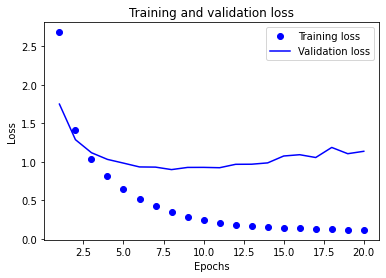

In [ ]:
# 훈련과 검증 손실 시각화
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

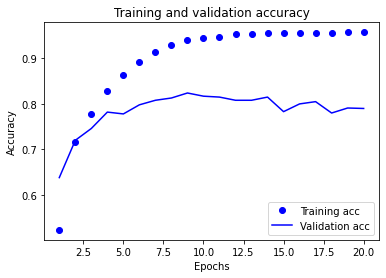

In [ ]:
# 훈련과 검증 정확도 시각화
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()
fig2.savefig('fig2.png', dpi=100)

위 그래프에서 알 수 있듯이 이번엔 8-9번째에서 오버피팅이 이뤄지는 것을 알 수 있다.

따라서 전체 데이터에 대한 테스트는 9번의 epoch만 진행한다.

In [ ]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Epoch 1/9
16/16 [==============================] - 2s 63ms/step - loss: 2.6217 - accuracy: 0.5284 - val_loss: 1.7246 - val_accuracy: 0.6560
Epoch 2/9
16/16 [==============================] - 1s 50ms/step - loss: 1.3951 - accuracy: 0.7066 - val_loss: 1.2887 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 1s 50ms/step - loss: 1.0265 - accuracy: 0.7809 - val_loss: 1.1105 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 1s 53ms/step - loss: 0.8102 - accuracy: 0.8261 - val_loss: 1.0164 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 1s 51ms/step - loss: 0.6445 - accuracy: 0.8628 - val_loss: 0.9569 - val_accuracy: 0.8030
Epoch 6/9
16/16 [==============================] - 1s 50ms/step - loss: 0.5161 - accuracy: 0.8919 - val_loss: 0.9129 - val_accuracy: 0.8200
Epoch 7/9
16/16 [==============================] - 1s 50ms/step - loss: 0.4214 - accuracy: 0.9123 - val_loss: 0.8930 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

대략 78%의 정확도를 가진다. 

원래 데이터를 불균등한 분포에 따라 랜덤으로 분류하는 경우 18%의 확률을 가지는 것에 비해 좋은 결과이다.

## 레이블과 손실을 다루는 다른 방법

앞에서 언급한 정수 텐서로 변환은 다음과 같이 할 수 있다.

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

이 경우 손실 함수만 변경해주면 된다.

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

기존 categorical_crossentropy와 인터페이스만 다를 뿐이고, 수학적으로는 같다.

## 충분히 큰 중간층을 두어야 하는 이유
출력이 46차원이기 때문에 중간층의 히든 유닛이 46개에 비해 많이 적으면 정보의 병목이 발생한다. 


중간층을 46차원보다 매우 적은 4차원으로 진행할 경우, 진행해본 결과는 다음과 같다.

In [ ]:
# 46차원보다 훨씬 작은 중간층을 두어 정보의 병목을 확인
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, 
          partial_y_train, 
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 2.8440 - accuracy: 0.1918 - val_loss: 2.0055 - val_accuracy: 0.5820
Epoch 2/20
63/63 [==============================] - 1s 21ms/step - loss: 1.6128 - accuracy: 0.6555 - val_loss: 1.4673 - val_accuracy: 0.6430
Epoch 3/20
63/63 [==============================] - 1s 22ms/step - loss: 1.2648 - accuracy: 0.6824 - val_loss: 1.3476 - val_accuracy: 0.6630
Epoch 4/20
63/63 [==============================] - 1s 23ms/step - loss: 1.1009 - accuracy: 0.7042 - val_loss: 1.2931 - val_accuracy: 0.6800
Epoch 5/20
63/63 [==============================] - 1s 21ms/step - loss: 0.9842 - accuracy: 0.7333 - val_loss: 1.2525 - val_accuracy: 0.6940
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 0.8894 - accuracy: 0.7597 - val_loss: 1.2449 - val_accuracy: 0.7110
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.8088 - accuracy: 0.7850 - val_loss: 1.2804 - val_accuracy: 0.7200
Epoch 8/20
63

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

71/71 [==============================] - 0s 4ms/step - loss: 2.2498 - accuracy: 0.6817
[2.2497718334198, 0.6816563010215759]


대략 10% 정도 차이가 나는 결과가 출력된다.
- 이런 손실의 원인 대부분은 많은 정보를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문이다.

## 정리
- softmax 사용
- 정보의 병목 방지

# 주택 가격 예측: 회귀 문제

이번 문제는 분류가 아닌 회귀(regression) 문제이다. 개별적인 레이블이 아닌 연속적인 값을 예측하는 것이다.

## 보스턴 주택 가격 데이터셋

1970년대 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측하는 문제이다.

이 문제의 데이터는 다음과 같은 특징을 지닌다.

- 데이터 포인트가 506개로 비교적 적음
- 404개의 훈련 샘플, 102개의 테스트 샘플
- 입력 데이터의 특성의 스케일이 서로 다름. ([0,1],[1,12],[1,100] 등)
- 13개의 특성을 가짐

In [2]:
# 보스턴 주택 데이터셋 로드하기
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


타깃값의 기본단위는 1,000 달러이다.

## 데이터 준비
상이한 스케일을 가진 값을 신경망에 주입하면 학습을 어렵게 만든다. 이런 데이터는 특성별로 정규화(표준화)가 필요하다.

각 특성을 특성의 평균을 빼고 표준편차로 나눈다.


그렇다면 특성의 평균은 0, 표준 편차는 1인 정규분포 형태의 데이터셋으로 만들어진다. 

정규화는 훈련 데이터 값만 이용해야 함을 주의한다.


In [3]:
# 데이터 정규화하기
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 모델 구성

샘플 개수가 적어 64개의 유닛을 가진 2개의 은닉 층으로 네트워크를 구성한다.

데이터가 적으므로 오버피팅을 막기 위한 방법이다.

In [4]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

- 동일한 모델을 여러번 생성하기 위한 사용자 함수
- 출력에 dense에 활성화 함수가 없음
- 이 방법은 전형적인 스칼라 회귀를 위한 구성입니다.
- 평균 제곱 오차(mse) 손실 함수를 이용함
- 평균 절대 오차(MAE) 로 모니터링함 (예측과 타깃의 절대적 거리)

## K-fold 검증을 사용한 훈련 검증

이 문제는 데이터가 매우 작기 때문에 검증 세트와 훈련 세트에서 어떤 데이터 포인트가 선택되었는지에 따라 검증 점수가 크게 달라진다.

이런 상황에서 좋은 방법은 K-fold 교차 검증(K-fold cross-validation)을 사용하는 것이다.

- 데이터를 K개의 fold로 나누고, K개의 모델을 만든다.
- 각각의 모델에서 K-1개의 분할에서 훈련하고, 나머지 분할에서 평가한다.
- 모델의 검증 점수는 K개의 검증 점수 평균이다.

In [7]:
# K-fold validation
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
[2.1564886569976807, 2.766249895095825, 2.8419365882873535, 2.506772518157959]
2.5678619146347046


검증 세트가 다르므로 확실히 검증 점수 2.15에서 2.85까지의 변화가 크다.

검증 세트에 따라 폭이 꽤 크므로 평균값을 이용하는게 더 신뢰할만 하다. 

평균값(2.56) 이 각각의 점수보다 훨씬 신뢰할만하다.

이 예제에서는 평균적으로 대략 2,560달러 정도 차이가 난다.

 신경망을 이번에 500 epoch만큼 훈련하고, 그에 따라 개선되는 정도를 확인한다.


그래프 개형상 200 ~ 300정도만 해도 괜찮을 것 같지만, 시간 측정을 위해 500으로 두고 진행한다.

In [8]:
# 각 폴드에서 검증 점수를 로그에 저장하기

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


그 후 모든 fold에 대해 epoch의 MAE 점수 평균을 계산한다.

In [9]:
# K-fold 검증 점수 평균을 기록하기
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

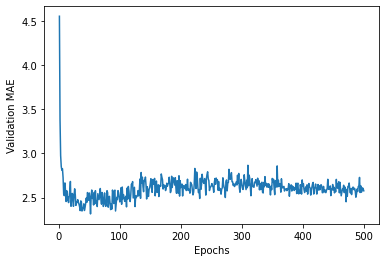

In [10]:
# 검증 점수 그래프 시각화
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

fig5 = plt.gcf()

plt.draw()
fig5.savefig('fig5.png', dpi=100)

위 그래프는 범위가 크고 변동이 심해 보기 어렵다.

그래프를 보기 좋게 수정한다.

- 스케일이 다른 첫 10개의 데이터를 제외한다.
- 부드러운 곡선을 위해 지수 이동 평균(exponential moving average) 으로 대체

지수 이동 평균은 시계열 데이터를 부드럽게 만드는 기법으로, 이전에 계산된 이동 평균에 factor를 곱하고 현재 포인트에 (1-factor)만큼 곱해 합산하는 방법이다.

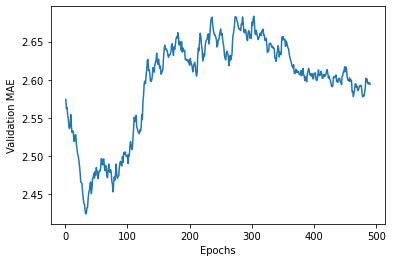

In [11]:
# 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

위 그래프에서 MAE는 40번째와 80번째에서 줄어드는 것을 멈춘다. 

이 지점으로 다시 오버피팅이 시작된다. 그렇기에 모델은 80 epoch만 진행하면 된다.

In [12]:
# 최종 모델 훈련
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 18.5111 - mae: 2.8338
2.8338069915771484


실제 가격과 2,800달러 정도 차이가 나는 것을 확인할 수 있다.(기존 가격의 스케일은 1만에서 5만 사이의 값이다.)

## 정리
- 회귀에서는 평균 제곱 오차를 손실 함수로 자주 사용한다.
- 평가 지표는 평균 절대 오차를 일반적으로 사용한다.
- 특성 스케일이 다른 경우, 스케일을 전처리 단계에서 조정한다.
- 가용 데이터가 적은 경우 K-fold validation 사용
- 훈련 데이터가 적다면 오버피팅을 피하기 위하여 은닉 층을 줄인다.

# 요약
- 일반적인 머신 러닝인 이진 분류, 다중 분류, 스칼라 회귀 작업
- 원본 데이터를 신경망에 넣기 위해서는 전처리 필요
- 스케일 조정
- 훈련이 진행됨에 따라 오버피팅이 일어남
- 훈련 데이터가 적은 경우, 적은 수의 은닉 층 : 보통 1개, 2개
- 회귀는 분류와 다른 손실 함수와 평가 지표 사용
- 적은 데이터는 K-겹 검증이 신뢰할 수 있는 모델 평가를 도와줌